# Introduction to `pandas` and `matplotlib` with example data from USGS's `dataretrieval`

`pandas` facilitates a lot of data analysis including the powerful [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html), which helps you use the ["split-apply-combine"](https://pandas.pydata.org/docs/user_guide/groupby.html) method of data analysis

`matplotlib` is a popular and easy to use plotting library for Ptyhon. It resembles MATLAB plotting tools. 

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # numpy is where all the math happens

The US Geologic Survey is making it easier to find and retrieve their data. Most development so far has been in R, but a few blessed individuals have been developing a similar package in Python, [dataretrieval](https://github.com/USGS-python/dataretrieval). Read more about [automated data retrieval](https://waterservices.usgs.gov/rest/Site-Service.html). Since I mocked up this activity for EARS33 in March 2022, there are a lot of new features and [demos](https://github.com/DOI-USGS/dataretrieval-python/tree/master/demos/hydroshare) on the repo. 


In [2]:
# Note if you are running this somewhere where dataretrieval is not installed you will have to run the following line:
# !pip install dataretrieval

In [3]:
from dataretrieval import nwis

# Part 1: Class example activity

## Learning objectives
- Practice data analysis skills with `pandas` and plotting skills with `matplotlib`
- Recognize [RESTful APIs](https://www.codecademy.com/article/what-is-rest) and formulaic, automated data retrieval from agencies like the USGS with `dataretrieval`
- Test concepts of watershed hydrology addressed in textbook and lecture with real-life data
- Devise algorithmic approaches to analyzing time series data

For this activity, I demonstrate the use of nested watersheds and their gages. I grabbed three gages from nested watersheds by loookin at [this map](https://dashboard.waterdata.usgs.gov/app/nwd/en/?region=lower48&aoi=default). 


In [4]:
# Make a list of strings corresponding to site IDs. 
# These use quotes to denote they are strings and not numbers
# They are separated by commas and bound by square brackets

sitelist = ["01075000", "01081500", "01092000"]


In [5]:
site_info = nwis.get_record(sites=sitelist, service='site')

print('Available data are:\n', site_info.columns.values) # "\n" just puts a line break in a text (string)
print('Station names are:\n', site_info['station_nm'])


Available data are:
 ['agency_cd' 'site_no' 'station_nm' 'site_tp_cd' 'lat_va' 'long_va'
 'dec_lat_va' 'dec_long_va' 'coord_meth_cd' 'coord_acy_cd'
 'coord_datum_cd' 'dec_coord_datum_cd' 'district_cd' 'state_cd'
 'county_cd' 'country_cd' 'land_net_ds' 'map_nm' 'map_scale_fc' 'alt_va'
 'alt_meth_cd' 'alt_acy_va' 'alt_datum_cd' 'huc_cd' 'basin_cd' 'topo_cd'
 'instruments_cd' 'construction_dt' 'inventory_dt' 'drain_area_va'
 'contrib_drain_area_va' 'tz_cd' 'local_time_fg' 'reliability_cd'
 'gw_file_cd' 'nat_aqfr_cd' 'aqfr_cd' 'aqfr_type_cd' 'well_depth_va'
 'hole_depth_va' 'depth_src_cd' 'project_no']
Station names are:
 0                 PEMIGEWASSET RIVER AT WOODSTOCK, NH
1            MERRIMACK RIVER AT FRANKLIN JUNCTION, NH
2    MERRIMACK R NR GOFFS FALLS, BELOW MANCHESTER, NH
Name: station_nm, dtype: object


Using my data calls as an example, find the coordinates of these sites. You can find what these dizzying terms mean in this [hard-to-find example webpage from the USGS](https://waterservices.usgs.gov/nwis/site/?siteOutput=Expanded&site=01075000). For your own reference, plot them as locations in Google Maps or the mapping program of your choosing. 

In [6]:
# your code ehre

Now, let's collect data on streamflow!

In [7]:
# Initialize a blank dataframe object
df = pd.DataFrame()

Parameter codes for the USGS are here:https://help.waterdata.usgs.gov/codes-and-parameters/parameters To get discharge, use "00060"

In [9]:
# This loop will iterate through each of the objects in sitelist and assign it 
# a number "i" as it assigns the variable siteNumber to the sitelist object

for i, siteNumber in enumerate(sitelist):
    # This is the parameter code for discharge in cfs
    parameterCode = "00060"
    # These are strings of dates
    startDate = "2023-01-01"
    endDate = "2023-12-31"
    # Make a temporary dataframe to store the records of each site
    df_temp = nwis.get_record(sites=siteNumber, service='dv', start=startDate, end=endDate, parameterCd='00060')
    # And then concatenate (stick on vertically) each site's data to the previous sites' data
    df = pd.concat([df, df_temp])
    # This method keeps our dataframe compact - each of the sites have the same
    # data, and we can always parse by site number later

c:\Users\Joanmarie\miniconda3\envs\ears33\Lib\site-packages\dataretrieval\nwis.py:1098: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  record_df = pd.read_json(record_json,
c:\Users\Joanmarie\miniconda3\envs\ears33\Lib\site-packages\dataretrieval\nwis.py:1098: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  record_df = pd.read_json(record_json,
c:\Users\Joanmarie\miniconda3\envs\ears33\Lib\site-packages\dataretrieval\nwis.py:1098: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  record_df = pd.read_json(record_json,


In [10]:
df

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
2023-01-01 00:00:00+00:00,1380.0,A,01075000
2023-01-02 00:00:00+00:00,1060.0,A,01075000
2023-01-03 00:00:00+00:00,779.0,A,01075000
2023-01-04 00:00:00+00:00,725.0,A,01075000
2023-01-05 00:00:00+00:00,1010.0,A,01075000
...,...,...,...
2023-12-27 00:00:00+00:00,11400.0,P,01092000
2023-12-28 00:00:00+00:00,11100.0,P,01092000
2023-12-29 00:00:00+00:00,12500.0,P,01092000


You may notice that there are codes associated with each measurement in `00060_Mean_cd`. The The `P` values are provisional data. We can create a dataframe with only non-provisional data by [subsetting](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html) the data:

In [12]:
no_prov = df[df['00060_Mean_cd'] != 'P']
no_prov

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
2023-01-01 00:00:00+00:00,1380.0,A,01075000
2023-01-02 00:00:00+00:00,1060.0,A,01075000
2023-01-03 00:00:00+00:00,779.0,A,01075000
2023-01-04 00:00:00+00:00,725.0,A,01075000
2023-01-05 00:00:00+00:00,1010.0,A,01075000
...,...,...,...
2023-08-17 00:00:00+00:00,4980.0,A,01092000
2023-08-18 00:00:00+00:00,5100.0,A,01092000
2023-08-19 00:00:00+00:00,6080.0,A,01092000


Now we're going to do a groupby that will [group rows with similar values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) for a certain column for analysis. After we groupby, we can query the values of a different column, but grouped by the first column.

In this case the code is going to make three separate plots, one for each site_no, of the column 00060_Mean, or mean daily discharge.





Text(0, 0.5, 'Streamflow (cfs)')

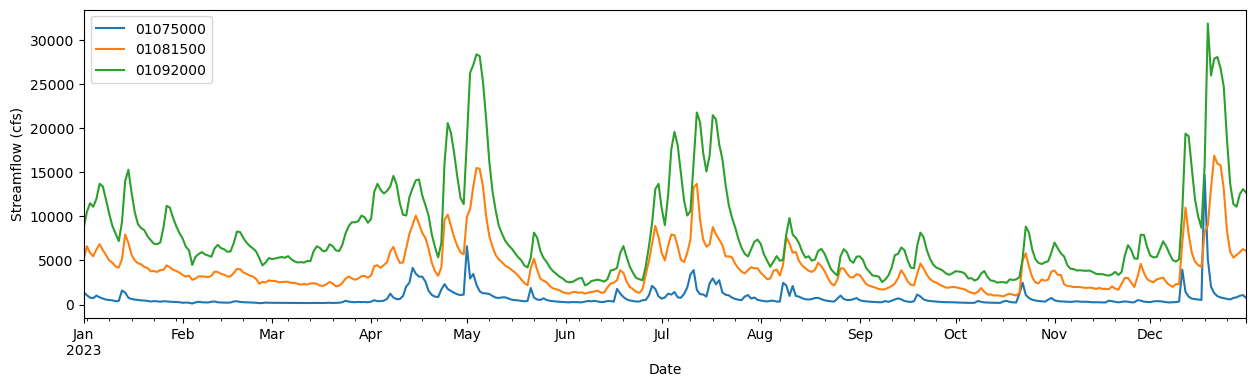

In [13]:
fig, ax = plt.subplots(figsize=(15,4))

for site, group in df.groupby(by='site_no'):
    
    # site_info = nwis.get_record(sites=site, service='site')

    group.plot(y='00060_Mean', ax=ax, legend=True, label=site)

ax.set_xlabel('Date')
ax.set_ylabel('Streamflow (cfs)')

#https://stackoverflow.com/questions/39902522/pandas-groupby-object-in-legend-on-plot

Very cool! Discuss with a classmate next to you:

1. Which plot represents the watershed with the smallest drainage area? The largest? How do you know?
2. Are the upstream sites always a consistent percentage of the downstream sites' discharges? Why or why not? How might that be explained? What other data might you need to test this idea?

## Tell me a story!

Now it's your turn. Use the [National Water Dashboard](https://dashboard.waterdata.usgs.gov/app/nwd/?region=lower48&aoi=default) to pick a stream gage and tell me a story!

c:\Users\Joanmarie\miniconda3\envs\ears33\Lib\site-packages\dataretrieval\nwis.py:1098: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  record_df = pd.read_json(record_json,


Text(0, 0.5, 'Streamflow (cfs)')

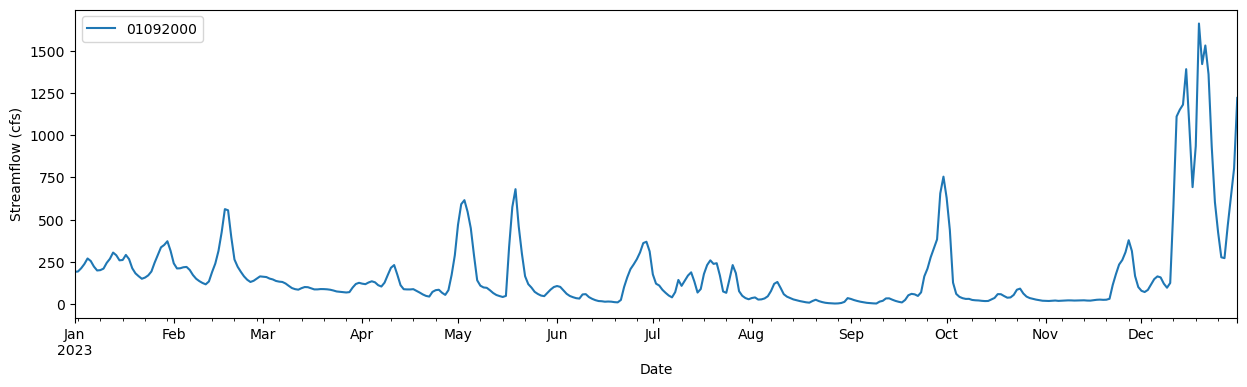

In [16]:
df_example = nwis.get_record(sites='02042500', service='dv', start=startDate, end=endDate, parameterCd='00060')

fig, ax = plt.subplots(figsize=(15,4))

df_example.plot(y='00060_Mean', ax=ax, legend=True, label=site)

ax.set_xlabel('Date')
ax.set_ylabel('Streamflow (cfs)')

# Part 2: discharge trends in Alaskan rivers

Let's get really tricky to do some "big data" tasks!

So I used this search page to create a table of all Alaska gage sites and then use Pandas to parse the resulting table: https://waterdata.usgs.gov/ak/nwis/current?submitted_form=introduction

In [22]:
# Uncomment if you need this
# !pip install lxml

   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
    --------------------------------------- 0.1/3.9 MB 1.2 MB/s eta 0:00:04
   ----- ---------------------------------- 0.5/3.9 MB 4.4 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/3.9 MB 6.3 MB/s eta 0:00:01
   -------------------- ------------------- 2.0/3.9 MB 9.8 MB/s eta 0:00:01
   ---------------------- ----------------- 2.2/3.9 MB 9.8 MB/s eta 0:00:01
   -------------------------------- ------- 3.2/3.9 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 3.9/3.9 MB 11.9 MB/s eta 0:00:00


In [19]:
import requests

In [20]:
url = 'https://waterdata.usgs.gov/ak/nwis/current?index_pmcode_STATION_NM=1&index_pmcode_DATETIME=2&group_key=basin_cd&format=sitefile_output&sitefile_output_format=html_table&column_name=agency_cd&column_name=site_no&column_name=station_nm&sort_key_2=site_no&html_table_group_key=NONE&rdb_compression=file&list_of_search_criteria=realtime_parameter_selection'

usgs_url = requests.get(url)

[`pd.read_html()`](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) parses for tables, which is why I generated a table (and not the tab-delimeted text, which seems like that should have worked but whatever)

In [23]:
# This returns a LIST of dataframes
usgs_data = pd.read_html(usgs_url.text)

C:\Users\Joanmarie\AppData\Local\Temp\ipykernel_7888\1033128750.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  usgs_data = pd.read_html(usgs_url.text)


In [24]:
# So let's look at the first (and only) dataframe that comes out
usgs_data = usgs_data[0]

usgs_data.head()

,Agency,Site Number,Site Name
0,USGS,15008000,SALMON R NR HYDER AK
1,USGS,15015595,UNUK R BL BLUE R NR WRANGELL AK
2,USGS,15019990,TYEE LK OUTLET NR WRANGELL AK
3,USGS,15024800,STIKINE R NR WRANGELL AK
4,USGS,15041200,TAKU R NR JUNEAU AK


In [25]:
# get_record takes a string
site_string = str(usgs_data.iloc[0]["Site Number"])
# And iloc[0] is "the data at index location 0"
site_info = nwis.get_record(sites=site_string, service='site')
print("Lat: ", site_info['dec_lat_va'])
print("Long: ", site_info['dec_long_va'])


Lat:  0    56.025815
Name: dec_lat_va, dtype: float64
Long:  0   -130.066982
Name: dec_long_va, dtype: float64


In [39]:
# Get the peak discharge history for the site and clean bad data
df_hist = nwis.get_record(sites=site_string, service='peaks', start='1900-01-01', end=endDate, parameterCd='00060')
df_hist['year'] = pd.DatetimeIndex(pd.to_datetime(df_hist.index)).year


Text(0, 0.5, 'Streamflow (cfs)')

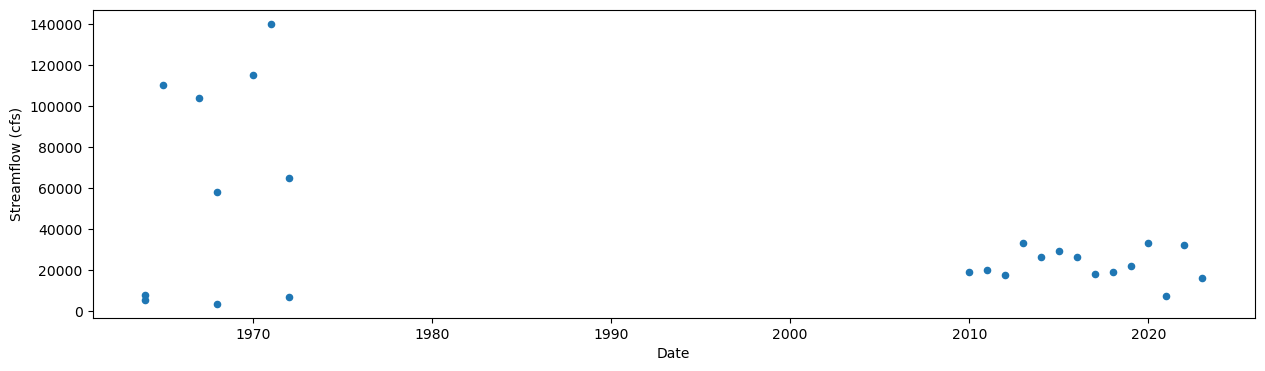

In [40]:
fig, ax = plt.subplots(figsize=(15,4))
data = df_hist.plot.scatter(x='year', y='peak_va', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Streamflow (cfs)')

One of the things I wonder in my work is based on climate change, will the biggest discharge events (which have historically occurred early in the growing season and are associated with snowmelt) instead be associated with rainstorms later in the growing season, when the ground is more thawed?

Prompt: can you test the hypothesis that ***maximum floods are occurring later in the year?*** And **are those floods getting bigger**?

In [78]:
df = pd.DataFrame()

# Just the first couple for demonstration
sitelist = [str(integer) for integer in usgs_data['Site Number']][0:5]

for i, siteNumber in enumerate(sitelist):
    # This is the parameter code for discharge in cfs
    parameterCode = "00060"
    # These are strings of dates
    startDate = "1900-01-01"
    endDate = "2023-12-31"
    # Make a temporary dataframe to store the records of each site
    df_temp = nwis.get_record(sites=siteNumber, service='peaks', start=startDate, end=endDate, parameterCd='00060')
    # And then concatenate (stick on vertically) each site's data to the previous sites' data
    
    df_temp['year'] = pd.DatetimeIndex(pd.to_datetime(df_temp.index)).year

    df_temp['rank'] = df_temp['peak_va'].rank(ascending=False)

    df_temp.sort_values(by=['rank'])

    df_temp['RI'] = (df_temp.shape[0] + 1) / df_temp['rank']

    df_temp['Q_ms'] = df_temp['peak_va'] / 35.315
    
    df = pd.concat([df, df_temp])
    # This method keeps our dataframe compact - each of the sites have the same
    # data, and we can always parse by site number later

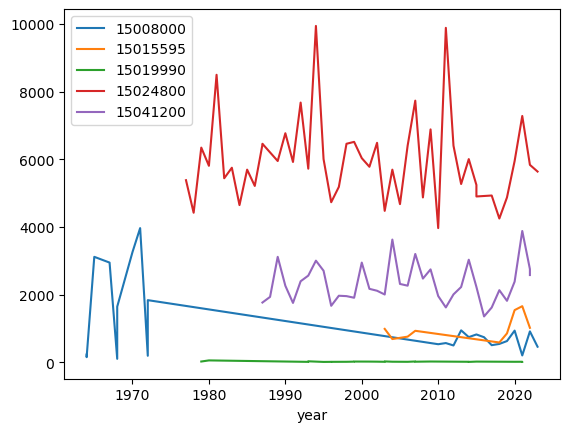

In [81]:
fig, ax = plt.subplots(
    # figsize=(10,4)
    )

for site, group in df.groupby(by='site_no'):
    group.plot(x='year',y='Q_ms', ax=ax, legend=True, label=site)


Fun!!

Ingredients to additional analyses:


1.   Sitewise parsing of maximum flood dates
2.   Some means of quantifying the trend in date of the peak flood (perhaps a [regression line fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) to the day of year of max flood?
3.   Some means of reducing that quantification of trend down to a single number or variable that can be added to the `usgs_data` dataframe 

